# 9a. NetCDF Line Dataset plotting example
Plots a magnetic survey line dataset on a satellite map. Points are subsampled for plotting.

In [1]:
%matplotlib inline

In [2]:
import netCDF4
import os
from geophys_utils import NetCDFLineUtils
from plot_point_dataset import plot_point_dataset
from pprint import pprint

In [3]:
# Create NetCDFPointUtils object for specified netCDF dataset
######   AEM links will be updated when available ######
nc_path = "/iv65/Geoscience_Australia_Geophysics_Reference_Data_Collection/airborne_geophysics/SA/line/P1255/P1255-line-magnetic-Marree-AWAGS_MAG_2010.nc"
if not os.path.isfile(nc_path):
    nc_path = "https://dapds00.nci.org.au/thredds/dodsC/iv65/Geoscience_Australia_Geophysics_Reference_Data_Collection/airborne_geophysics/SA/line/P1255/P1255-line-magnetic-Marree-AWAGS_MAG_2010.nc"

netcdf_dataset = netCDF4.Dataset(nc_path)
npu = NetCDFLineUtils(netcdf_dataset)

In [4]:
print('1D Point variables:\n\t{}'.format('\n\t'.join([key for key, value in netcdf_dataset.variables.items()
                                          if value.dimensions == ('point',)])))

1D Point variables:
	line_index
	FID
	altitude
	lineType
	mag_awagslevelled
	mag_microlevelled
	mag_tielevelled
	longitude
	latitude


/srv/conda/envs/notebook/lib/python3.10/site-packages/osgeo/osr.py:385: FutureWarning: Neither osr.UseExceptions() nor osr.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


utm_zone = 54
19047545 points in UTM bounding box: [57105.98273920809, 6706014.832661777, 357422.18592742825, 6903130.083938198]
show


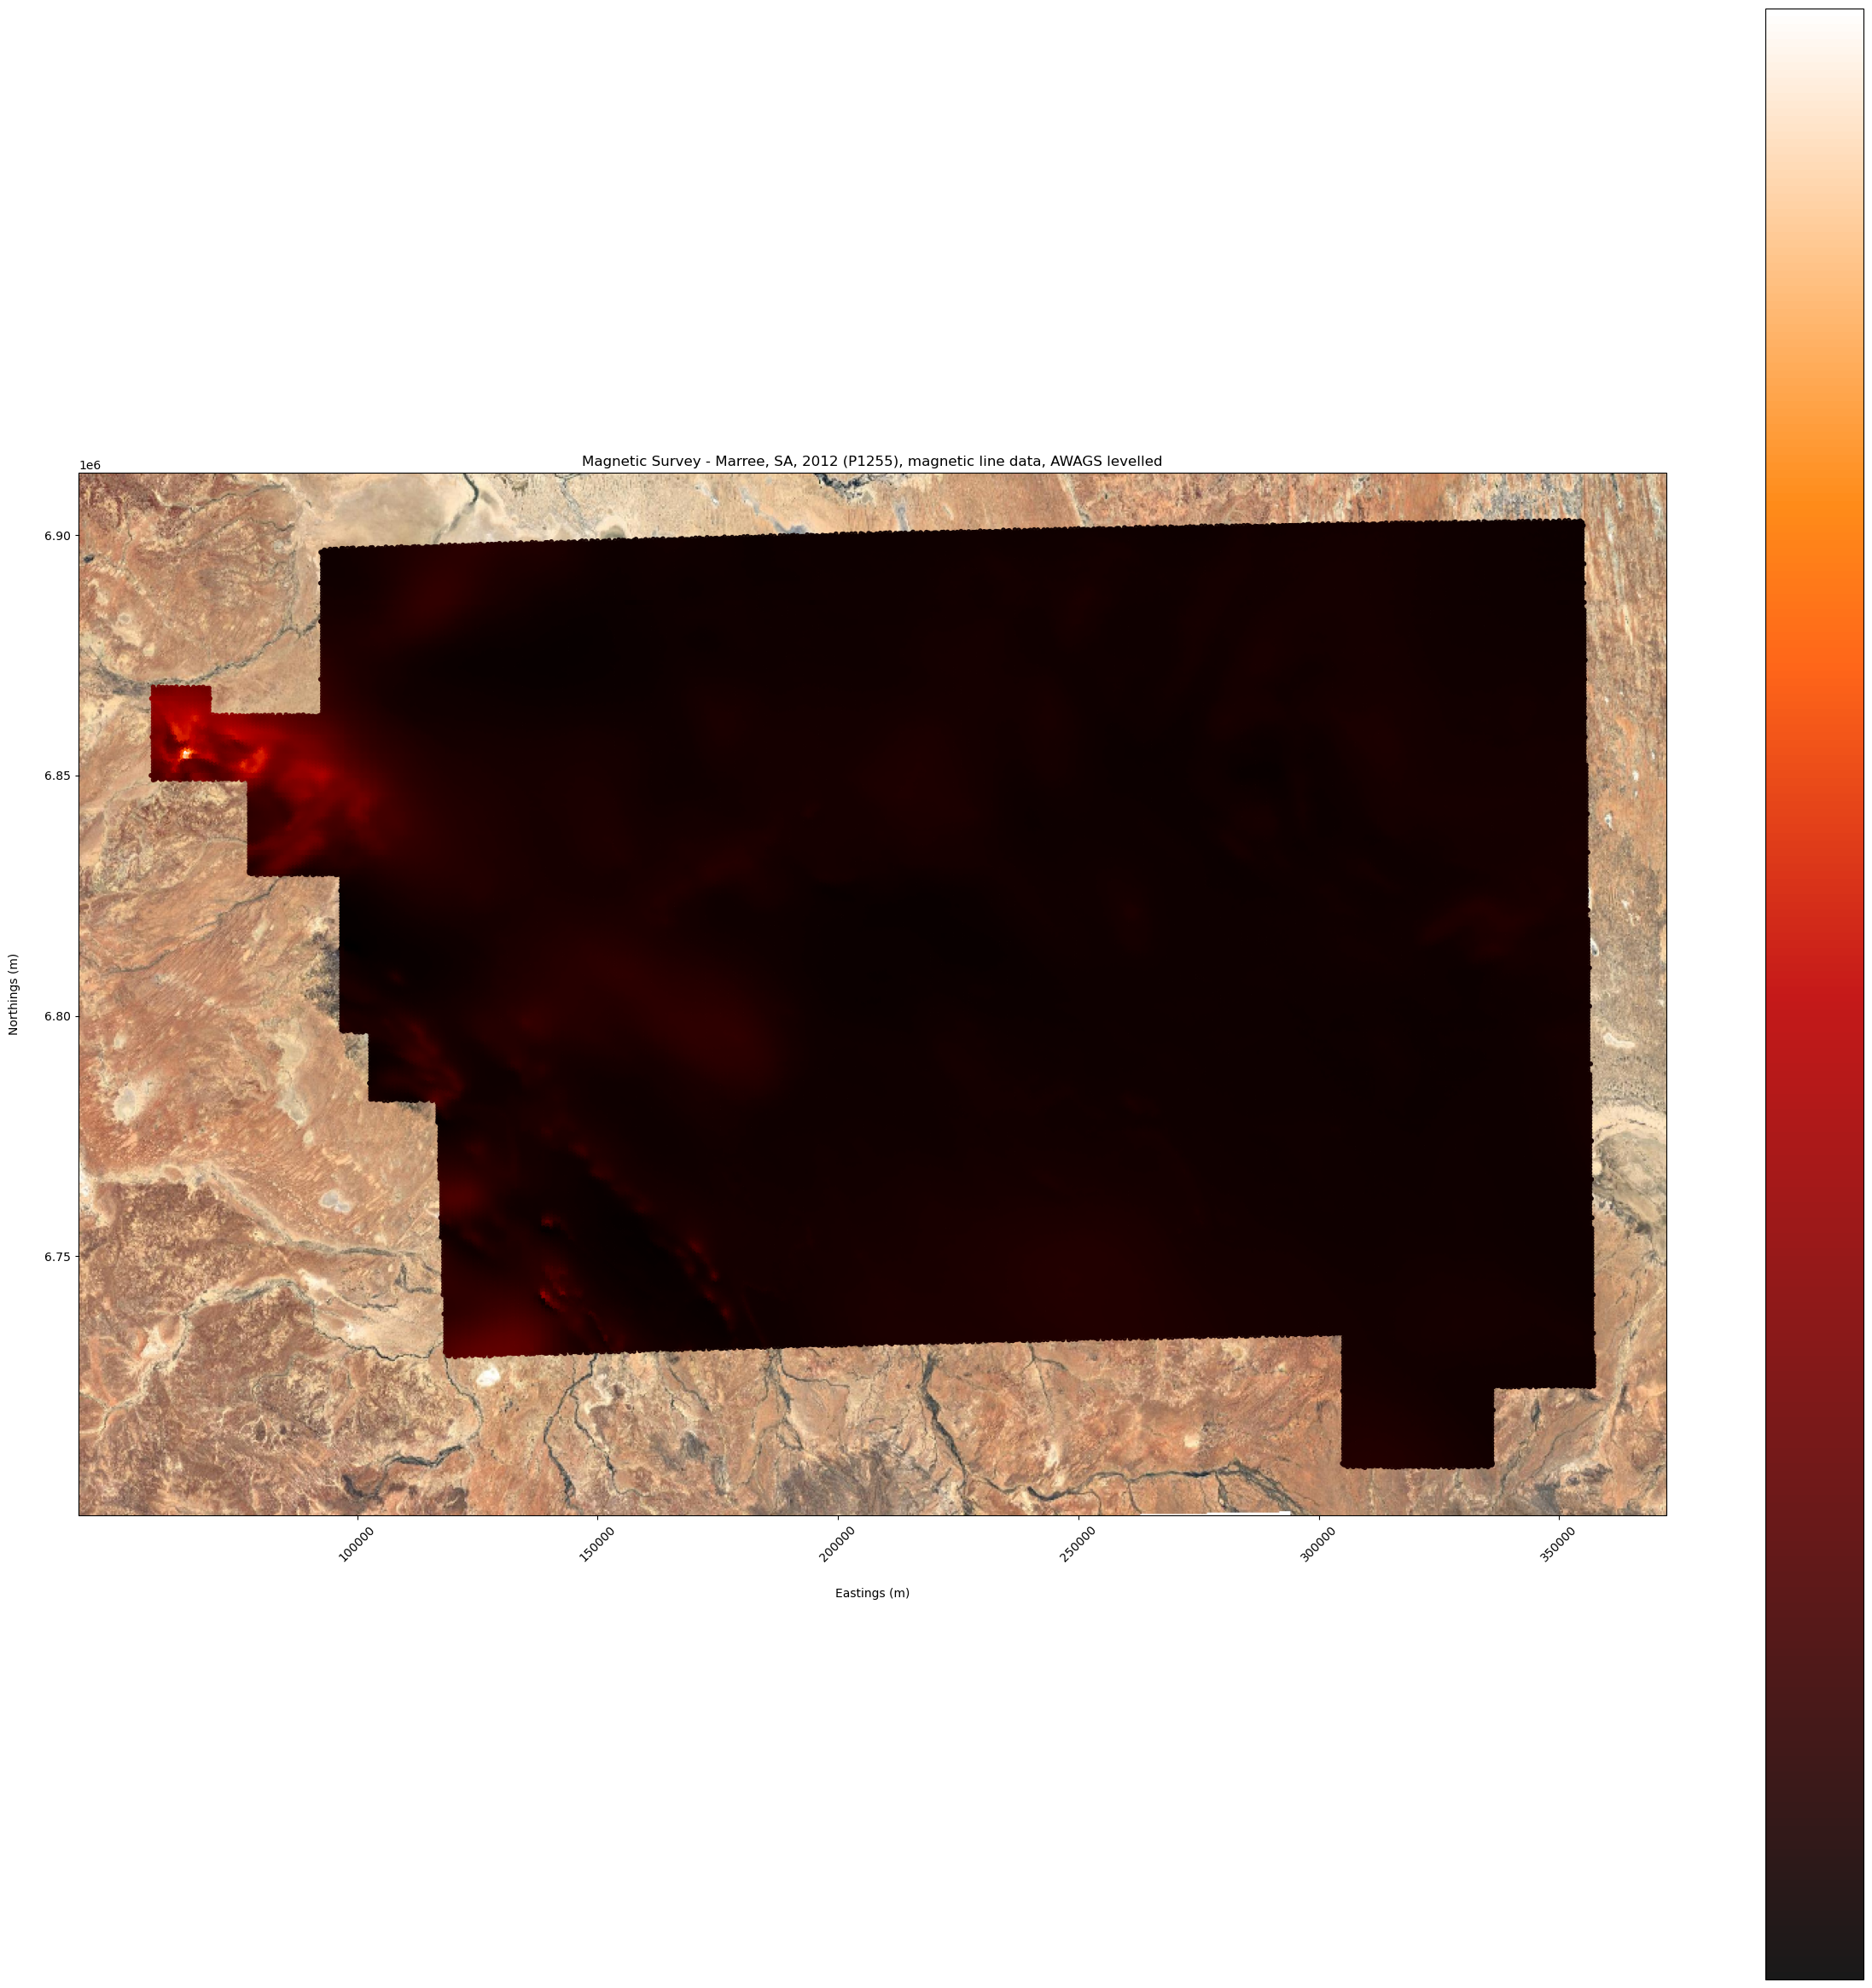

In [5]:
# Plot entire survey
plot_point_dataset(npu, 
                   'mag_awagslevelled', 
                   plot_title='Magnetic Survey - '+netcdf_dataset.title,
                   colour_scheme='gist_heat',
                   point_step=100)

utm_zone = 54
1063514 points in UTM bounding box: [200000, 6825000, 250000, 6875000]
show


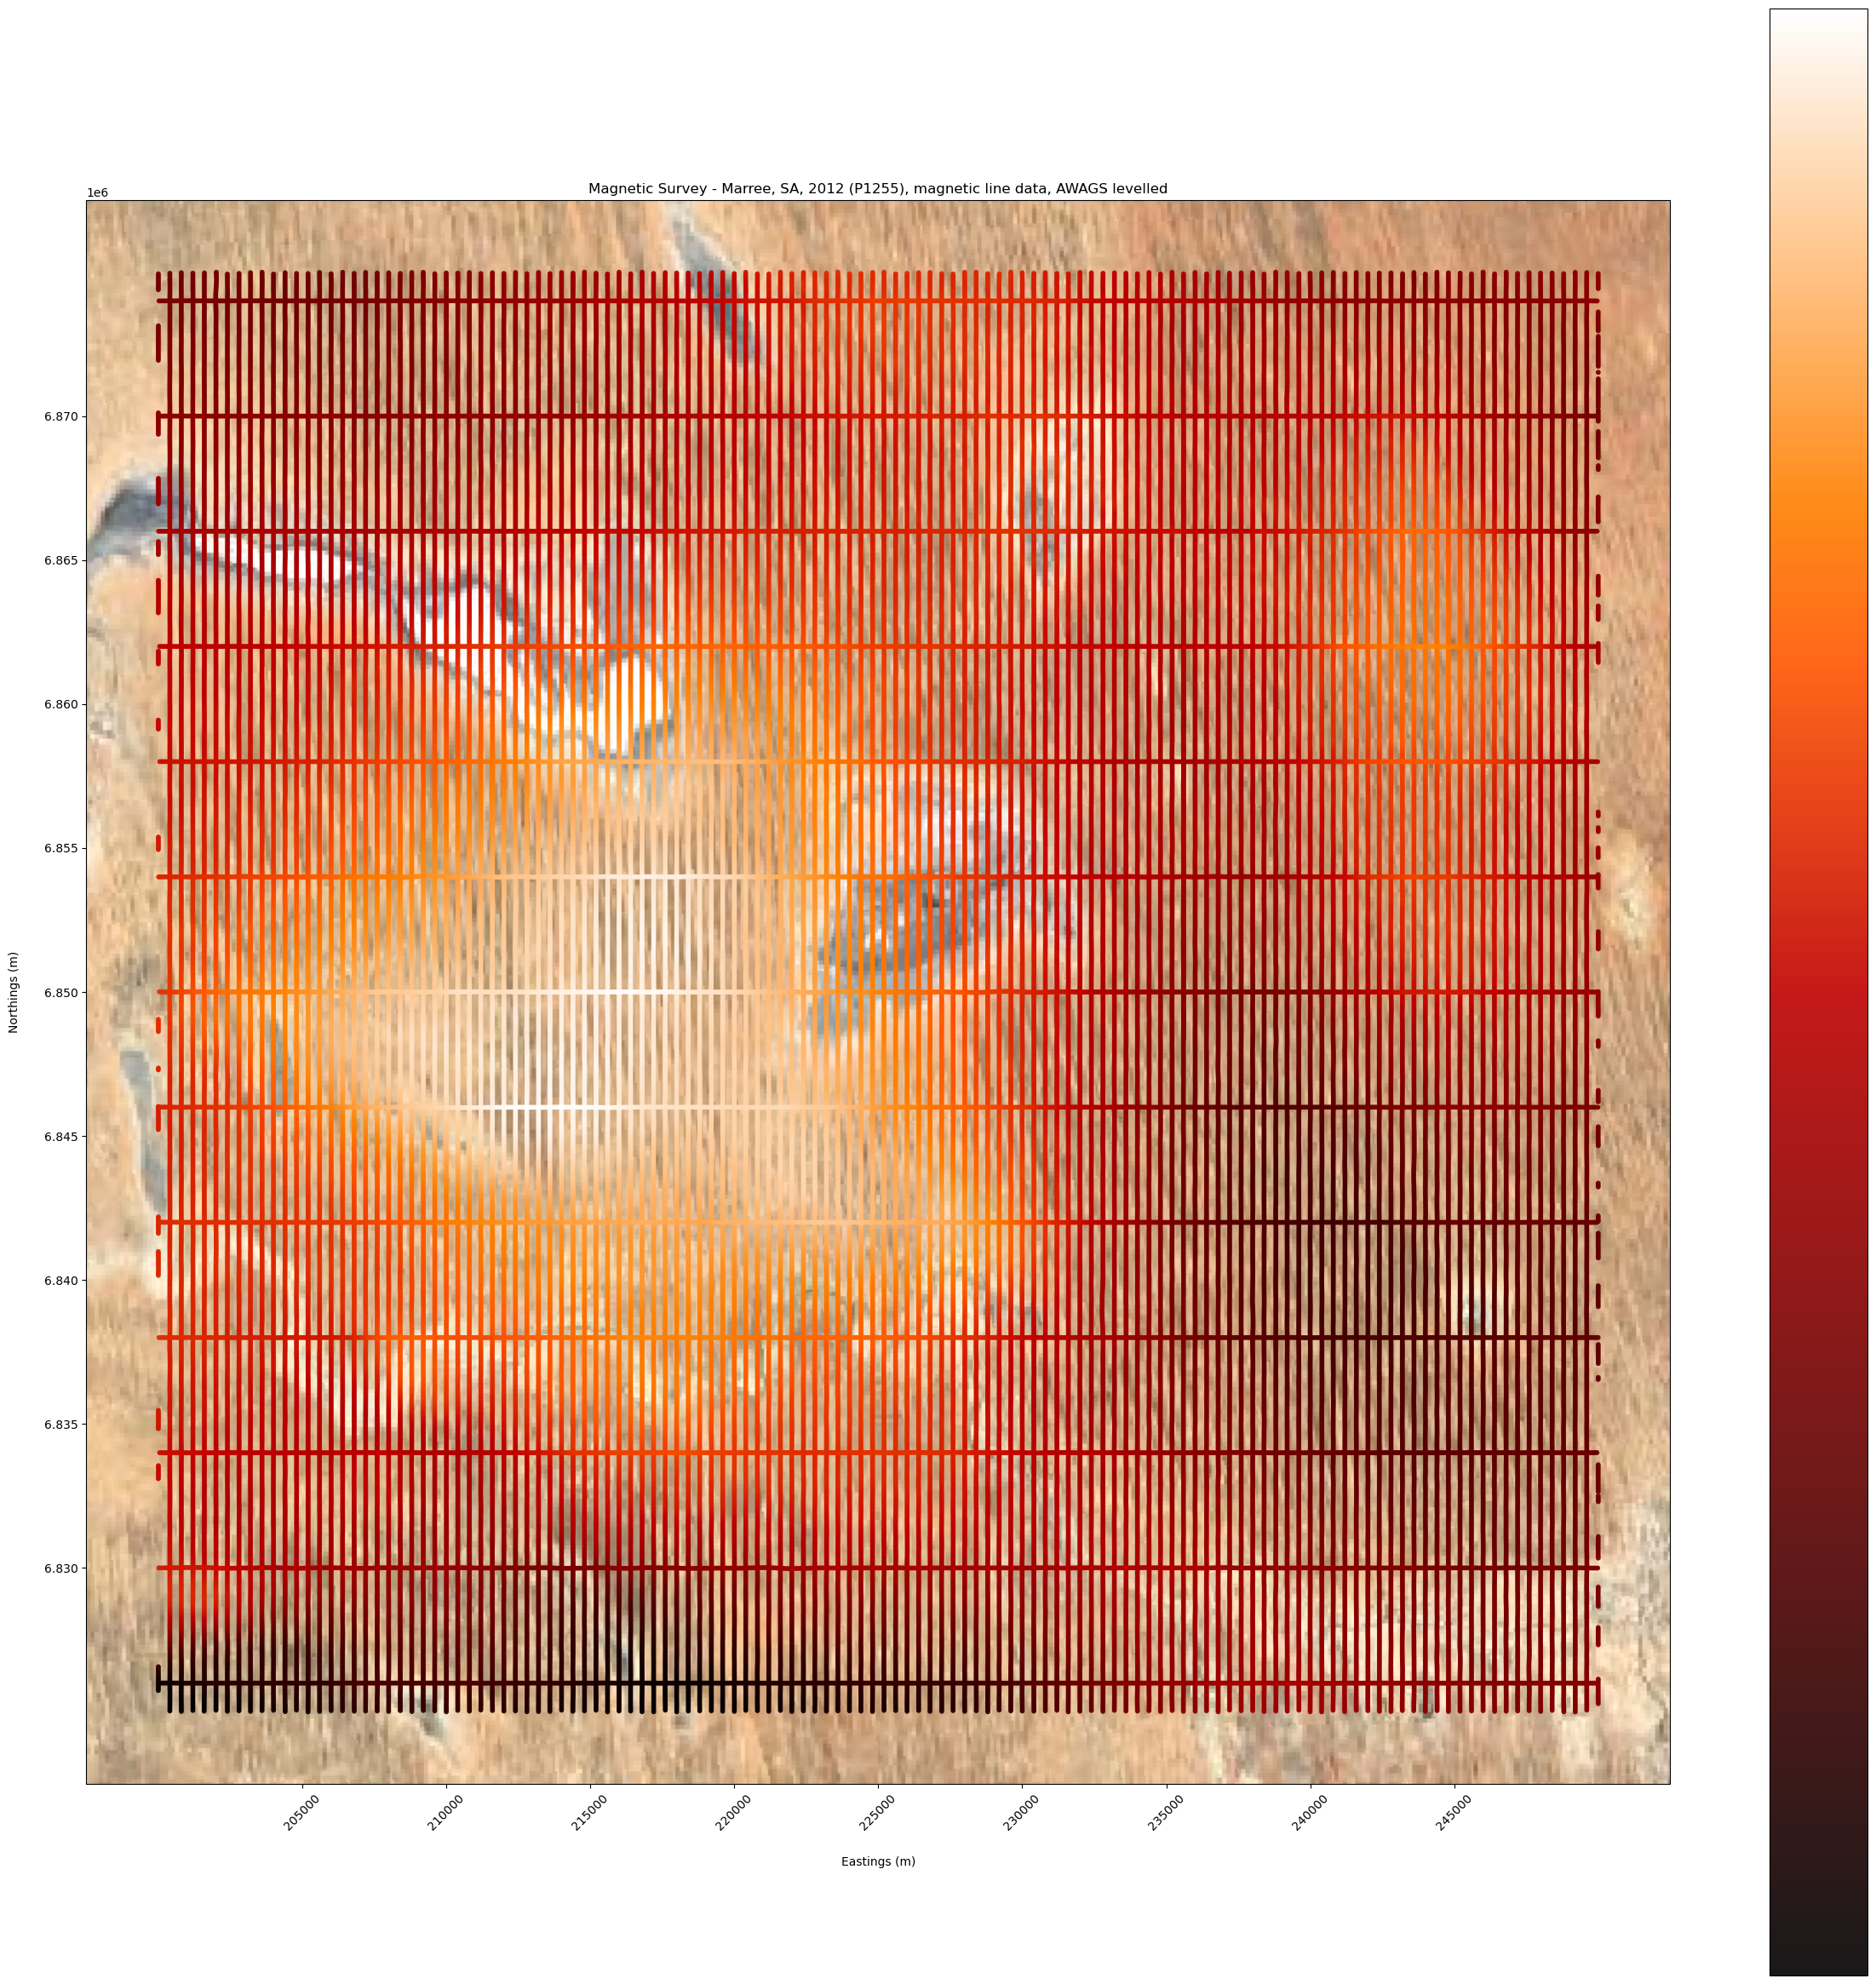

In [6]:
# Plot subset of survey
plot_point_dataset(npu, 
                   'mag_awagslevelled', 
                   plot_title='Magnetic Survey - '+netcdf_dataset.title,
                   utm_bbox=[200000, 6825000, 250000, 6875000],
                   colour_scheme='gist_heat',
                   point_step=10)